In [ ]:
import pandas as pd
import os
os.chdir(r"C:\Users\dsala\Downloads")

base = pd.read_csv('train_PS3.csv')




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38644 entries, 0 to 38643
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   property_id                            38644 non-null  object 
 1   city                                   38644 non-null  object 
 2   price                                  38644 non-null  int64  
 3   month                                  38644 non-null  int64  
 4   year                                   38644 non-null  int64  
 5   surface_total                          7854 non-null   float64
 6   surface_covered                        8565 non-null   float64
 7   rooms                                  20384 non-null  float64
 8   bedrooms                               38644 non-null  int64  
 9   bathrooms                              28573 non-null  float64
 10  property_type                          38644 non-null  object 
 11  op

(None,
                 property_id        city      price  month  year  \
 0  4fa04a187235d7509a43a8cf  Bogotá D.C  580000000     10  2020   
 1  f9cfbb306af543a759c1f3f2  Bogotá D.C  600000000     10  2020   
 2  957a84e8e93ae2b33bc6f61b  Bogotá D.C  400000000     10  2020   
 3  eb32d75b32bc5e8677207fc7  Bogotá D.C  800000000     10  2020   
 4  880a6e7bd74dc2568940d275  Bogotá D.C  480000000     10  2020   
 
    surface_total  surface_covered  rooms  bedrooms  bathrooms  ...  \
 0            NaN              NaN    3.0         3        NaN  ...   
 1            NaN              NaN    9.0         9        NaN  ...   
 2            NaN              NaN    8.0         8        NaN  ...   
 3            NaN              NaN    6.0         6        NaN  ...   
 4            NaN              NaN    NaN         3        3.0  ...   
 
                                               title  \
 0                            de casa en los cerezos   
 1                           casa en floral

In [2]:
# Descriptive statistics for numerical columns
desc_stats = base.describe(include=[float, int])

# Percentage of missing values per column
missing_percentage = base.isnull().mean() * 100

desc_stats, missing_percentage


(              price         month          year  surface_total  \
 count  3.864400e+04  38644.000000  38644.000000    7854.000000   
 mean   6.545347e+08      5.665381   2020.294043     153.950216   
 std    3.114179e+08      3.288876      0.759993     274.370273   
 min    3.000000e+08      1.000000   2019.000000      16.000000   
 25%    4.150000e+08      3.000000   2020.000000      84.000000   
 50%    5.599900e+08      5.000000   2020.000000     119.000000   
 75%    8.100000e+08      8.000000   2021.000000     185.000000   
 max    1.650000e+09     12.000000   2021.000000   17137.000000   
 
        surface_covered         rooms      bedrooms     bathrooms  \
 count      8565.000000  20384.000000  38644.000000  28573.000000   
 mean        131.932399      3.008487      3.144602      2.883771   
 std          76.616355      1.371515      1.534818      1.093248   
 min           2.000000      1.000000      0.000000      1.000000   
 25%          81.000000      2.000000      2.00000

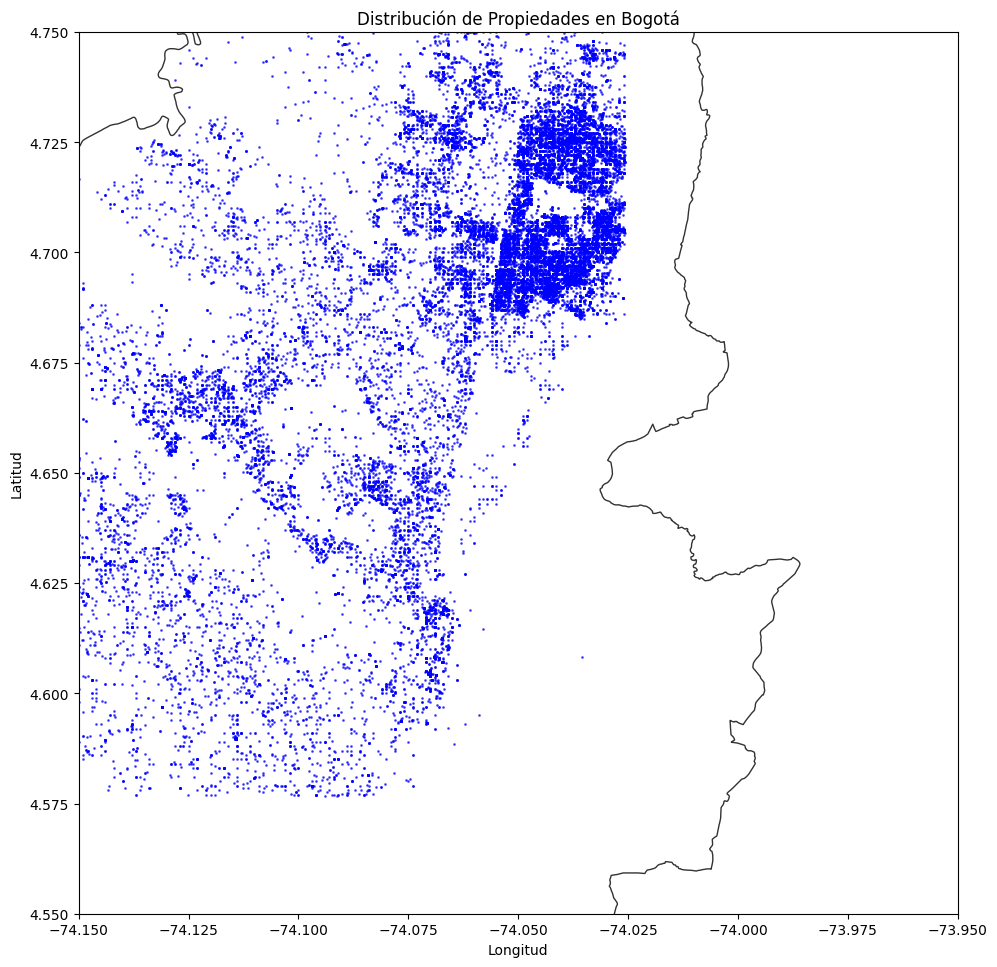

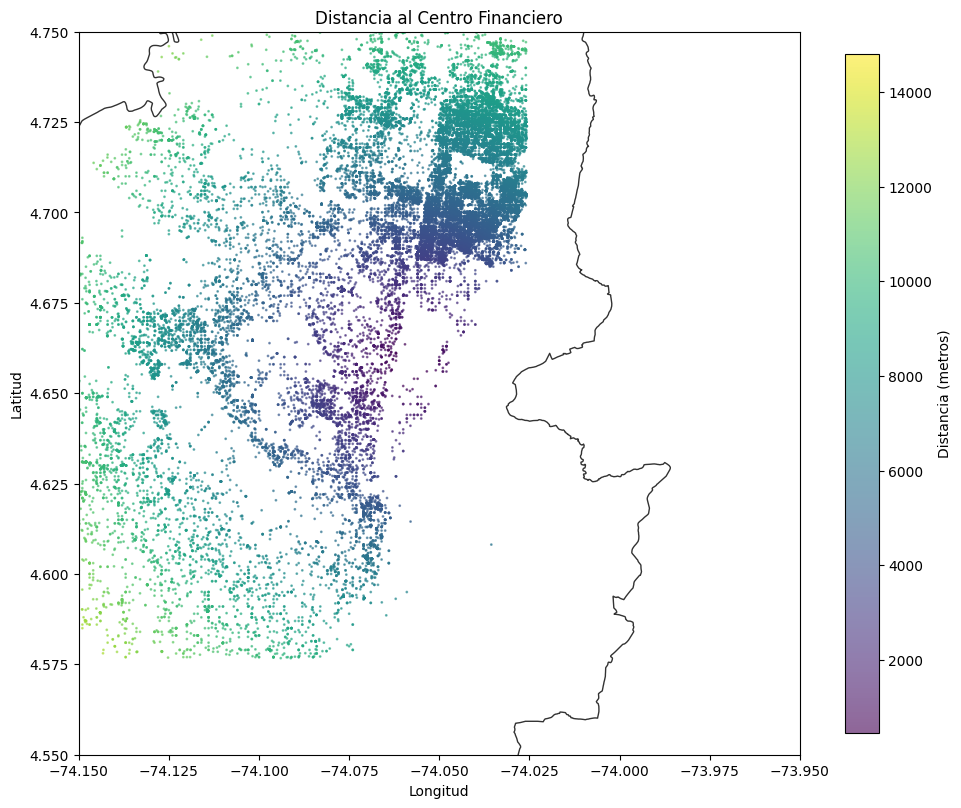

In [16]:
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
data=base
# Cargar el contorno de Bogotá
bogota_boundary = ox.geocode_to_gdf("Bogotá, Colombia")

# Convertir los datos a GeoDataFrame
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]
geo_data = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# Mapa 1: Distribución de propiedades
fig, ax = plt.subplots(figsize=(10, 10))
bogota_boundary.plot(ax=ax, color='none', edgecolor='black', alpha=0.8)
geo_data.plot(ax=ax, markersize=1, color='blue', alpha=0.6)
ax.set_title("Distribución de Propiedades en Bogotá")
ax.set_xlim(-74.15, -73.95)
ax.set_ylim(4.55, 4.75)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
plt.tight_layout()
plt.show()

# Mapa 2: Proximidad al centro financiero
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(
    data['lon'], data['lat'],
    c=data['distance_to_financial_center'],
    cmap='viridis', s=1, alpha=0.6
)
bogota_boundary.plot(ax=ax, color='none', edgecolor='black', alpha=0.8)
ax.set_title("Distancia al Centro Financiero")
ax.set_xlim(-74.15, -73.95)
ax.set_ylim(4.55, 4.75)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
cbar = fig.colorbar(scatter, ax=ax, orientation="vertical", shrink=0.7)
cbar.set_label("Distancia (metros)")
plt.tight_layout()
plt.show()


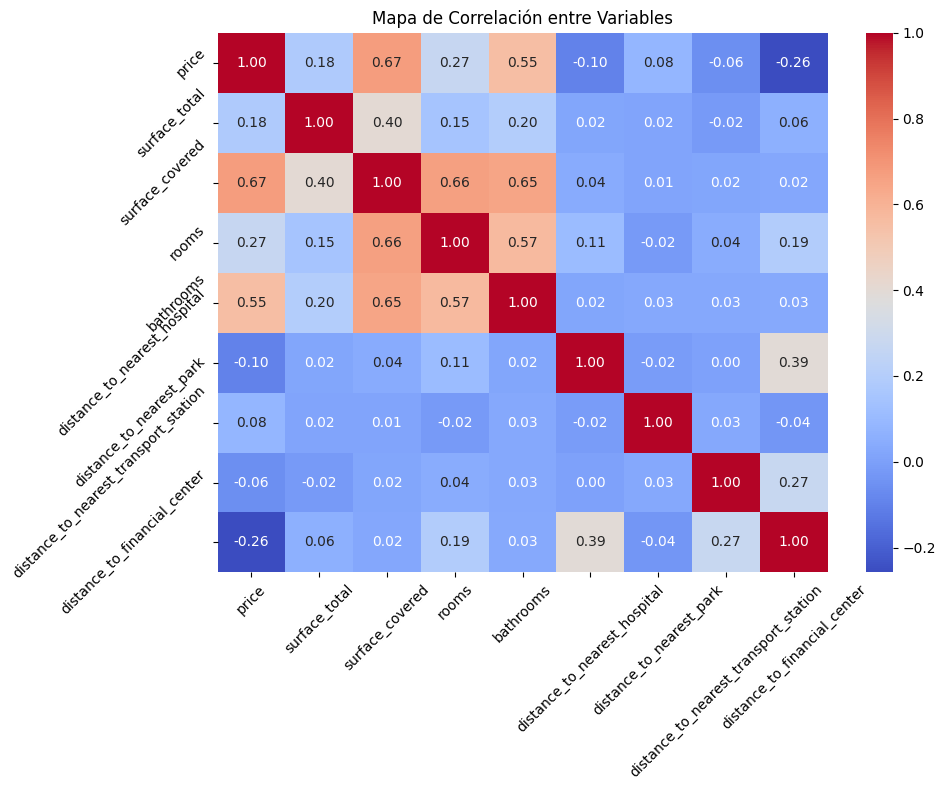

price                                    1.000000
surface_covered                          0.672002
bathrooms                                0.554874
rooms                                    0.269310
surface_total                            0.181216
distance_to_nearest_park                 0.083903
distance_to_nearest_transport_station   -0.057332
distance_to_nearest_hospital            -0.098976
distance_to_financial_center            -0.258104
Name: price, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# vairables para ver correlacion
columns_of_interest = [
    'price', 'surface_total', 'surface_covered', 'rooms',
    'bathrooms', 'distance_to_nearest_hospital', 'distance_to_nearest_park',
    'distance_to_nearest_transport_station', 'distance_to_financial_center'
]

# Filtrar los datos para esas columnas
data_for_correlation = data[columns_of_interest]

# Calcular correlaciones
correlation_matrix = data_for_correlation.corr()

# Visualizar la matriz como mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
    annot_kws={"size": 10}
)
plt.title("Mapa de Correlación entre Variables")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar las correlaciones de 'price' con otras variables
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_price)
